In [67]:
!pip install easyocr  # Colab already has all dependencies

In [77]:
!pip install opencv-python

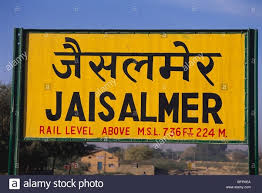

In [102]:
# show an image
import PIL
from PIL import ImageDraw
im = PIL.Image.open("jaisalmer.jpg")
im

In [115]:
image1 = cv2.imread('jaisalmer.jpg') 
  
# cv2.cvtColor is applied over the 
# image input with applied parameters 
# to convert the image in grayscale 
img = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY) 
  
# applying Otsu thresholding 
# as an extra flag in binary  
# thresholding      
ret, thresh1 = cv2.threshold(img, 120, 255, cv2.THRESH_BINARY + 
                                            cv2.THRESH_OTSU)  
cv2.imwrite("binarized.jpg",thresh1)


True

In [122]:
# Create a reader to do OCR.
# If you change to GPU instance, it will be faster. But CPU is enough.
# (by MENU > Runtime > Change runtime type > GPU, then redo from beginning )
import easyocr
reader = easyocr.Reader(['hi','en'])

In [125]:
# Doing OCR. Get bounding boxes.
bounds = reader.readtext('jaisalmer.jpg')
bounds

[([[44, 32], [233, 32], [233, 93], [44, 93]], 'जैसलमेर', 0.7975533977879962),
 ([[39, 85], [229, 85], [229, 129], [39, 129]],
  'JAISALMER',
  0.6855550541718719),
 ([[37, 123], [97, 123], [97, 137], [37, 137]],
  'RAIL LEVEL',
  0.9686354121694984),
 ([[101, 125], [229, 125], [229, 141], [101, 141]],
  'ABOUE  MSL.7Z6FT २24 M.',
  0.14609324918766173),
 ([[21, 177], [107, 177], [107, 191], [21, 191]],
  'alaiy Gtock photo',
  0.2150280474493039)]

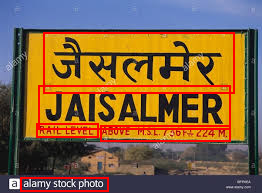

In [126]:
# Draw bounding boxes
def draw_boxes(image, bounds, color='red', width=2):
    draw = ImageDraw.Draw(image)
    for bound in bounds:
        p0, p1, p2, p3 = bound[0]
        draw.line([*p0, *p1, *p2, *p3, *p0], fill=color, width=width)
    return image

draw_boxes(im, bounds)

In [119]:
def get_text(bounds):
  text=""
  for bound in bounds:
    text+= bound[1]+" "
  return text
get_text(bounds)

'जैसलमेर JAISALMER RAIL LEVEL ABOUE  MSL.7Z6FT २24 M. alaiy Gtock photo '

In [85]:
!pip install spellchecker

     |████████████████████████████████| 3.9MB 17.9MB/s 
  Created wheel for spellchecker: filename=spellchecker-0.4-cp37-none-any.whl size=3966516 sha256=fdf4fddfda43105ec847020813d7d7041554584a68e2437c9fd9cba81f66ffd4
  Stored in directory: /root/.cache/pip/wheels/a2/e6/ad/28ab959cba7100f5c562a3d1711cd34b630734d241c4e1bd40
  Created wheel for inexactsearch: filename=inexactsearch-1.0.2-cp37-none-any.whl size=7113 sha256=c574f646ac7a87dfb8467833caf78b226a53207eb5326c57c01868329fe5e1d5
  Stored in directory: /root/.cache/pip/wheels/58/e0/c1/e3fed0e9fd1a3708bc91870fb0ba30ef88527540006763674b
  Created wheel for soundex: filename=soundex-1.1.3-cp37-none-any.whl size=8861 sha256=4eaccaad1cc5e2fa5dc5b867d611d57c8a0e2680cabf266c7febbedf8e4c583b
  Stored in directory: /root/.cache/pip/wheels/b5/bb/e6/9a4b6be56c40aa707509bddaf6d414187461ded9db7a25a41a
  Created wheel for silpa-common: filename=silpa_common-0.3-cp37-none-any.whl size=8453 sha256=183fabc6d88646393163efec89cf88aa1be5ee672b511af08

In [90]:
from spellchecker import SpellChecker

In [91]:
dir(SpellChecker)

['_SpellChecker__edit_distance_alt',
 '__class__',
 '__contains__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__slots__',
 '__str__',
 '__subclasshook__',
 '_case_sensitive',
 '_check_if_should_check',
 '_distance',
 '_tokenizer',
 '_word_frequency',
 'candidates',
 'correction',
 'distance',
 'edit_distance_1',
 'edit_distance_2',
 'export',
 'known',
 'split_words',
 'unknown',
 'word_frequency',
 'word_probability',
 'word_usage_frequency']

In [92]:
spell = SpellChecker()

In [109]:
text=""
for bound in bounds:
  text+= spell.correction(bound[1])+" "
print(text)

जैसलमेर JAISALMER RAIL LEVEL ABOUE  MSL.7Z6FT २24 M. alaiy Gtock photo 


In [128]:
bounds = reader.readtext('jaisalmer.jpg',detail=0)
bounds

['जैसलमेर',
 'JAISALMER',
 'RAIL LEVEL',
 'ABOUE  MSL.7Z6FT २24 M.',
 'alaiy Gtock photo']

In [131]:
!pip install googletrans

In [132]:
import googletrans

print(googletrans.LANGUAGES)

{'af': 'afrikaans', 'sq': 'albanian', 'am': 'amharic', 'ar': 'arabic', 'hy': 'armenian', 'az': 'azerbaijani', 'eu': 'basque', 'be': 'belarusian', 'bn': 'bengali', 'bs': 'bosnian', 'bg': 'bulgarian', 'ca': 'catalan', 'ceb': 'cebuano', 'ny': 'chichewa', 'zh-cn': 'chinese (simplified)', 'zh-tw': 'chinese (traditional)', 'co': 'corsican', 'hr': 'croatian', 'cs': 'czech', 'da': 'danish', 'nl': 'dutch', 'en': 'english', 'eo': 'esperanto', 'et': 'estonian', 'tl': 'filipino', 'fi': 'finnish', 'fr': 'french', 'fy': 'frisian', 'gl': 'galician', 'ka': 'georgian', 'de': 'german', 'el': 'greek', 'gu': 'gujarati', 'ht': 'haitian creole', 'ha': 'hausa', 'haw': 'hawaiian', 'iw': 'hebrew', 'he': 'hebrew', 'hi': 'hindi', 'hmn': 'hmong', 'hu': 'hungarian', 'is': 'icelandic', 'ig': 'igbo', 'id': 'indonesian', 'ga': 'irish', 'it': 'italian', 'ja': 'japanese', 'jw': 'javanese', 'kn': 'kannada', 'kk': 'kazakh', 'km': 'khmer', 'ko': 'korean', 'ku': 'kurdish (kurmanji)', 'ky': 'kyrgyz', 'lo': 'lao', 'la': 'lat

In [133]:
from googletrans import Translator

In [134]:
translator = Translator()

In [137]:
result = translator.translate('where are you', dest='hi')

AttributeError: ignored